# <center>Ensemble learning methods</center>

# <center>Recap: Decision Trees, CV and Data preparation</center>

# Table of contents  
  
1. [Prepare-data routine](#prep-data)
    1. [Titanic Data](#titanic)
    2. [One-hot Encoding](#onehot)
2. [Decision Tree Classifier](#dtclass)
3. [Задания](#tasks)


# Compatibility issues

Ниже представлено описание конфигурации - версии питона и пакетов.  
Для отличных конфигураций некоторые вычисления могут не выполняться. В первую очередь это касается версий пакетов.  
Для версий питона позднее, чем представлена здесь, код должен успешно выполняться при условии, что версии пакетов совпадают.  

In [1]:
import sys
print(sys.version)

3.6.0 |Anaconda custom (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]


In [2]:
import subprocess
print(subprocess.run('conda --version', stdout=subprocess.PIPE).stdout.decode('utf-8'))

conda 4.3.16



In [3]:
print(subprocess.run('conda list', stdout=subprocess.PIPE).stdout.decode('utf-8'))

# packages in environment at D:\Anaconda:
#
_license                  1.1                      py36_1  
alabaster                 0.7.9                    py36_0  
anaconda                  custom                   py36_0  
anaconda-client           1.6.0                    py36_0  
anaconda-navigator        1.5.0                    py36_0  
anaconda-project          0.4.1                    py36_0  
astroid                   1.4.9                    py36_0  
astropy                   1.3                 np111py36_0  
babel                     2.3.4                    py36_0  
backports                 1.0                      py36_0  
beautifulsoup4            4.5.3                    py36_0  
bitarray                  0.8.1                    py36_1  
blaze                     0.10.1                   py36_0  
bokeh                     0.12.4                   py36_0  
boto                      2.45.0                   py36_0  
bottleneck                1.2.0               np111py36_

# Setup

In [4]:
import numpy as np
import pandas as pd

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# стиль seaborn
# style.available выводит все доступные стили
from matplotlib import style
style.use('seaborn')

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
# from pylab import rcParams
# rcParams['figure.figsize'] = 8, 5

# отключим предупреждения Anaconda
# import warnings
# warnings.simplefilter('ignore')

# Prepare-data routine <a id="prep-data"></a>

## Titanic dataset <a id="titanic"></a>

Набор данных из популярного соревнования на платформе Kaggle: [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).  
  
Данные содержат ряд признаков, описывающих пассажиров Титаника, и информацию о каждом пассажире - выжил он или погиб при крушении лайнера.

<h3>Описание данных<h3>
<h3>Data Dictionary</h3><table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>
<h3>Variable Notes</h3>
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>

In [5]:
titanic_data = pd.read_csv('titanic_train.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<br>
<br>
Удалим два наблюдения с пропусками по признаку **Embarked**

In [7]:
titanic_data.dropna(subset=['Embarked'], inplace=True)
titanic_data.reset_index(drop=True, inplace=True)
np.shape(titanic_data)

(889, 12)

<br>
<br>
<br>
По признаку **Cabin** очень много пропусков - удалим его. Но оставим информацию о том, пропущенно значение или нет - потом попробуем использовать этот признак при обучении.  

In [8]:
titanic_data['is_cabin_missed'] = titanic_data['Cabin'].isnull().astype('int64')
titanic_data.drop('Cabin', axis=1, inplace=True)

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


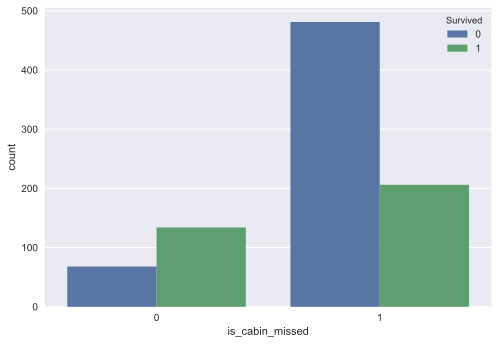

In [9]:
sns.countplot(x='is_cabin_missed', 
              hue='Survived',
              data=titanic_data)

<br>
<br>
<br>
Принак **Name** - просто имя пассажира в текстовом виде. В данном виде использовать нельзя, т.к. все значения уникальны.  
Попробуем вытащить из него "титул" пассажира.  

Методом проб и ошибок получился такой способ получить титулы:

In [10]:
title_area = titanic_data['Name'].str.split(',')

In [11]:
titles = pd.Series([x[1].split('.')[0] for x in title_area]).str.strip()

In [12]:
title_count = titles.value_counts()
title_count

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
Mme               1
Sir               1
Ms                1
the Countess      1
Capt              1
Jonkheer          1
Don               1
dtype: int64

Малочисленные титулы объединим в одну категорию.  
И избавимся от признака **Name**.

In [13]:
titanic_data['Title'] = titles
titanic_data.loc[titanic_data.Title.isin(title_count[title_count < 100].index), 'Title'] = 'Other'
titanic_data.drop('Name', axis=1, inplace=True)

In [14]:
titanic_data.Title.value_counts()

Mr       517
Miss     181
Mrs      124
Other     67
Name: Title, dtype: int64

In [15]:
del title_area, titles, title_count

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


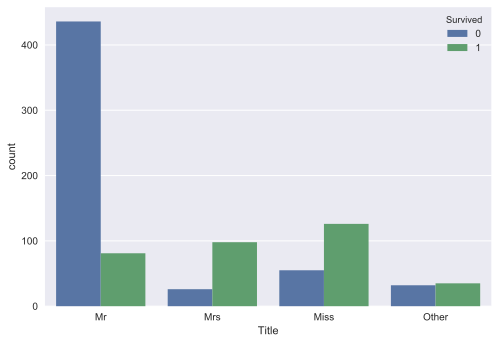

In [16]:
sns.countplot(x='Title', 
              hue='Survived',
              data=titanic_data)

<br>  
<br>
<br>  
Теперь разберемся с пропусками по признаку **Age**.  
Сначала посмотрим на распределение классов для объектов с пропусками и без:

In [17]:
is_age_missed = titanic_data['Age'].isnull()
titanic_data['is_age_missed'] = is_age_missed.astype('int64')

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


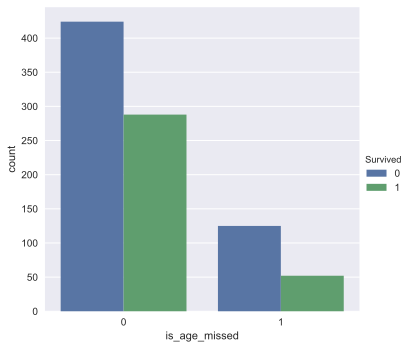

In [18]:
sns.factorplot(x='is_age_missed', 
               hue='Survived', 
               data=titanic_data, 
               kind='count', 
               size = 5)

Нормализуем столбцы по группам (потому что можем):

In [19]:
X = titanic_data[['is_age_missed', 'Survived', 'PassengerId']].groupby(['is_age_missed', 'Survived'], as_index=False).count()
X

,is_age_missed,Survived,PassengerId
0,0,0,424
1,0,1,288
2,1,0,125
3,1,1,52


In [20]:
x = X.groupby('is_age_missed')['PassengerId'].transform('sum')
x

0    712
1    712
2    177
3    177
Name: PassengerId, dtype: int64

In [21]:
X['Frac'] = np.round(X.PassengerId.div(x), 5)
X

,is_age_missed,Survived,PassengerId,Frac
0,0,0,424,0.59551
1,0,1,288,0.40449
2,1,0,125,0.70621
3,1,1,52,0.29379


D:\Anaconda\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


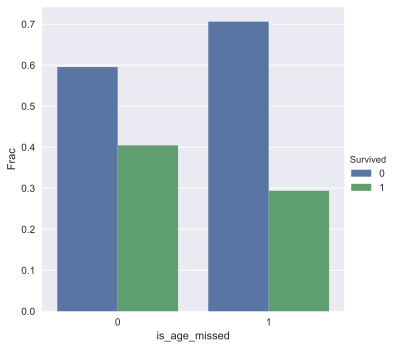

In [22]:
sns.factorplot(x='is_age_missed', 
               y='Frac',
               hue='Survived', 
               data=X, 
               kind='bar', 
               size = 5)

Видим, что распределение классов заметно различается. Есть смысл сохранить информацию о пропусках.  
Таким образом, не будем удалять пропуски по признаку **Age** - заменим их, например, нулевыми значениями.

In [23]:
titanic_data.Age.fillna(0, inplace=True)

del X, x, is_age_missed

<br>
<br>
<br>
Из признака **Ticket** извлечем только номер билета и сохраним его как числовой признак. 

In [24]:
titanic_data['Ticket_number'] = [x[-1] for x in titanic_data.Ticket.str.split()]

In [25]:
titanic_data['Ticket_number'].str.isdigit().value_counts()

True     885
False      4
Name: Ticket_number, dtype: int64

Несколько наблюдений оказались не числовыми. Заменим их просто на 0.  
Оригинальный признак **Ticket** удаляем.

In [26]:
titanic_data['Ticket'][~titanic_data['Ticket_number'].str.isdigit()]

178    LINE
270    LINE
301    LINE
596    LINE
Name: Ticket, dtype: object

In [27]:
titanic_data.loc[~titanic_data['Ticket_number'].str.isdigit(), 'Ticket_number'] = '0'
titanic_data['Ticket_number'] = titanic_data['Ticket_number'].astype('int64')
titanic_data.drop('Ticket', axis=1, inplace=True)

In [28]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
PassengerId        889 non-null int64
Survived           889 non-null int64
Pclass             889 non-null int64
Sex                889 non-null object
Age                889 non-null float64
SibSp              889 non-null int64
Parch              889 non-null int64
Fare               889 non-null float64
Embarked           889 non-null object
is_cabin_missed    889 non-null int64
Title              889 non-null object
is_age_missed      889 non-null int64
Ticket_number      889 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 90.4+ KB


In [29]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_cabin_missed,Title,is_age_missed,Ticket_number
0,1,0,3,male,22.0,1,0,7.2500,S,1,Mr,0,21171
1,2,1,1,female,38.0,1,0,71.2833,C,0,Mrs,0,17599
2,3,1,3,female,26.0,0,0,7.9250,S,1,Miss,0,3101282
3,4,1,1,female,35.0,1,0,53.1000,S,0,Mrs,0,113803
4,5,0,3,male,35.0,0,0,8.0500,S,1,Mr,0,373450
5,6,0,3,male,0.0,0,0,8.4583,Q,1,Mr,1,330877
6,7,0,1,male,54.0,0,0,51.8625,S,0,Mr,0,17463
7,8,0,3,male,2.0,3,1,21.0750,S,1,Other,0,349909
8,9,1,3,female,27.0,0,2,11.1333,S,1,Mrs,0,347742
9,10,1,2,female,14.0,1,0,30.0708,C,1,Mrs,0,237736


In [30]:
titanic_data.drop('PassengerId', axis=1).describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,is_cabin_missed,is_age_missed,Ticket_number
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,8.890000e+02
mean,0.382452,2.311586,23.740349,0.524184,0.382452,32.096681,0.772778,0.199100,2.974018e+05
std,0.486260,0.834700,17.562609,1.103705,0.806761,49.697504,0.419273,0.399548,6.571193e+05
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.895800,1.000000,0.000000,1.431200e+04
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.120530e+05
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,3.470820e+05
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,3.101317e+06


In [31]:
titanic_data.drop('PassengerId', axis=1).describe(include=['object'])

,Sex,Embarked,Title
count,889,889,889
unique,2,3,4
top,male,S,Mr
freq,577,644,517


## One-hot Encoding <a id="onehot"></a>

Перед тем, как обучать деревья решений, необходимо преобразовать категориальные признаки - привести их к бинарному виду.  
Эта необхоимость вызвана не самим алгоритмом построения дерева решений, а его [реализацией](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) в scikit-learn.

Преобразование можно выполнить самостоятельно, но мы воспользуемся возможностями библиотеки.

In [32]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ImportError: cannot import name 'OrdinalEncoder'

<br>
<br>
Переведем признак **Sex** в бинарный:

In [33]:
sex_enc = OrdinalEncoder()
sex_enc.fit(titanic_data[['Sex']])  # "Sex" in additional [] to remain DataFrame, not Series


OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [34]:
sex_enc.categories_

[array(['female', 'male'], dtype=object)]

In [35]:
sex_bin = sex_enc.transform(titanic_data[['Sex']])
sex_bin[:10]

array([[ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.]])

<br>
<br>
Теперь преобразуем оставшиеся категориальные признаки **Pclass**, **Embarked** и **Title**.  
Так ка они принимают более 2-х уникальных значений, для них используем другой метод:

In [36]:
ct = ColumnTransformer(
    [
        ('Pclass', OneHotEncoder(sparse=False, categories='auto'), ['Pclass']), 
        ('Embarked', OneHotEncoder(sparse=False), ['Embarked']), 
        ('Title', OneHotEncoder(sparse=False), ['Title'])
    ],
    remainder='drop'
)
ct.fit(titanic_data)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('Pclass', OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False), ['Pclass']), ('Embarked', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float...pe=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False), ['Title'])])

In [37]:
ct.get_feature_names()

['Pclass__x0_1',
 'Pclass__x0_2',
 'Pclass__x0_3',
 'Embarked__x0_C',
 'Embarked__x0_Q',
 'Embarked__x0_S',
 'Title__x0_Miss',
 'Title__x0_Mr',
 'Title__x0_Mrs',
 'Title__x0_Other']

In [38]:
X = pd.DataFrame(ct.transform(titanic_data),
                 columns=[x.replace('_x0', '') for x in ct.get_feature_names()])
X.head(10)

,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,Title__Miss,Title__Mr,Title__Mrs,Title__Other
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<br>
<br>
<br>
Добавим новые столбцы, заменим и удалим старые:

In [39]:
titanic_data.drop(['Sex', 'Pclass', 'Embarked', 'Title'], axis=1, inplace=True)

titanic_data['is_male'] = sex_bin

titanic_data = titanic_data.join(X)

titanic_data.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,is_cabin_missed,is_age_missed,Ticket_number,is_male,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,Title__Miss,Title__Mr,Title__Mrs,Title__Other
0,1,0,22.0,1,0,7.2500,1,0,21171,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,1,38.0,1,0,71.2833,0,0,17599,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,26.0,0,0,7.9250,1,0,3101282,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4,1,35.0,1,0,53.1000,0,0,113803,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,0,35.0,0,0,8.0500,1,0,373450,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,6,0,0.0,0,0,8.4583,1,1,330877,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,7,0,54.0,0,0,51.8625,0,0,17463,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,8,0,2.0,3,1,21.0750,1,0,349909,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,9,1,27.0,0,2,11.1333,1,0,347742,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,10,1,14.0,1,0,30.0708,1,0,237736,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 20 columns):
PassengerId        889 non-null int64
Survived           889 non-null int64
Age                889 non-null float64
SibSp              889 non-null int64
Parch              889 non-null int64
Fare               889 non-null float64
is_cabin_missed    889 non-null int64
is_age_missed      889 non-null int64
Ticket_number      889 non-null int64
is_male            889 non-null float64
Pclass__1          889 non-null float64
Pclass__2          889 non-null float64
Pclass__3          889 non-null float64
Embarked__C        889 non-null float64
Embarked__Q        889 non-null float64
Embarked__S        889 non-null float64
Title__Miss        889 non-null float64
Title__Mr          889 non-null float64
Title__Mrs         889 non-null float64
Title__Other       889 non-null float64
dtypes: float64(13), int64(7)
memory usage: 139.0 KB


In [41]:
np.shape(titanic_data)

(889, 20)

In [42]:
titanic_data.to_csv('titanic_train_mod.csv', index=False)

# Decision Trees <a id="dtclass"></a>

Guide: [here](http://scikit-learn.org/stable/modules/tree.html)  
DecisionTreeClassifier Doc: [here](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
DecisionTreeRegressor Doc: [here](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

<br>
<br>
Разделим данные на обучающую и тестовую выборки:

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(titanic_data.drop(['PassengerId', 'Survived'], axis=1),
                                titanic_data['Survived'],
                                test_size=0.3, 
                                random_state=236584)

In [45]:
print('Size of train set:', trainData.shape)
print('Size of test set:', testData.shape)

Size of train set: (622, 18)
Size of test set: (267, 18)


In [46]:
print('Class distribution on train:',
      train_label.value_counts(normalize=True),
      '\nClass distribution on test:', 
      test_label.value_counts(normalize=True),
      sep='\n')

Class distribution on train:
0    0.628617
1    0.371383
Name: Survived, dtype: float64

Class distribution on test:
0    0.59176
1    0.40824
Name: Survived, dtype: float64


<br>
<br>
Построим базовую модель:

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(trainData, train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Провизуализируем дерево решений. Для этого понадобится установить дополнительную библиотеку **graphviz**.  
Если используете анаконду:  `conda install python-graphviz`.  
Если используете обычный питон: `pip install graphviz`.

In [49]:
import graphviz
from sklearn.tree import export_graphviz

In [50]:
dot_data = export_graphviz(dtree_model, 
                           out_file=None, 
                           feature_names=trainData.columns, 
                           class_names=['0', '1'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("dtree_titanic_236584") 

'dtree_titanic_236584.pdf'

Оценим качество модели:

In [51]:
from sklearn import metrics

In [52]:
preds = dtree_model.predict(testData)

In [53]:
print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5))

Accuracy: 0.81648 
Balanced accuracy: 0.81791


In [54]:
print(metrics.classification_report(test_label, preds))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       158
           1       0.75      0.83      0.79       109

   micro avg       0.82      0.82      0.82       267
   macro avg       0.81      0.82      0.81       267
weighted avg       0.82      0.82      0.82       267



In [55]:
# Taken from
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from plot_cm import plot_confusion_matrix

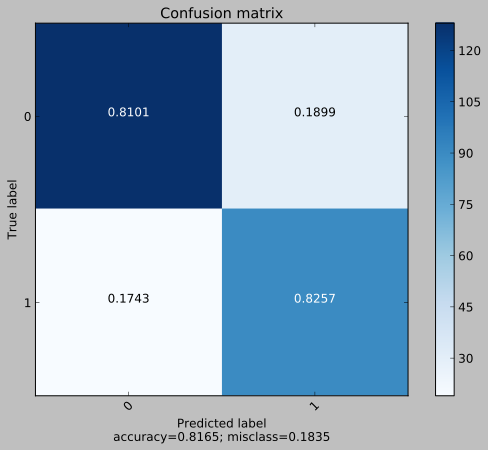

In [56]:
style.use('classic')
plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                      target_names=['0', '1'],
                      normalize=True)

<br>
<br>
Попробуем на другом разбиении:

In [57]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(titanic_data.drop(['PassengerId', 'Survived'], axis=1),
                                titanic_data['Survived'],
                                test_size=0.3, 
                                random_state=56428234)

In [58]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(trainData, train_label)

preds = dtree_model.predict(testData)

In [59]:
dot_data = export_graphviz(dtree_model, 
                           out_file=None, 
                           feature_names=trainData.columns, 
                           class_names=['0', '1'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("dtree_titanic_56428234") 

'dtree_titanic_56428234.pdf'

Accuracy: 0.7603 
Balanced accuracy: 0.74807

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       161
           1       0.70      0.69      0.70       106

   micro avg       0.76      0.76      0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



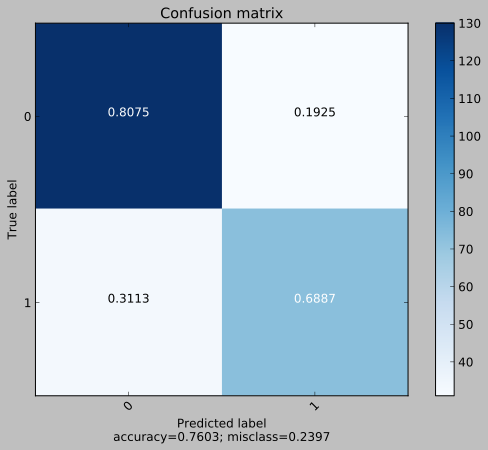

In [60]:
print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5))

print()
print(metrics.classification_report(test_label, preds))

plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                      target_names=['0', '1'],
                     normalize=True)

<br>
<br>
**Задание:**  
- Оцените на кросс валидации качество модели.  
- Используйте `StratifiedKFold(n_splits=5, shuffle=True)` и  `cross_val_score`, выполните 10 раз.  
- Также оцените baseline - используйте для этого `DummyClassifier`
- Также оцените модель на основе пола
- В качестве метрики используйте `f1-score (f1_micro)`

In [61]:
from sklearn.dummy import DummyClassifier

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [63]:
dt = DecisionTreeClassifier()
dm = DummyClassifier(strategy='most_frequent')

skf = StratifiedKFold(n_splits=5, shuffle=True)


scores_dtree = []
scores_dummy = []
scores_sexist = []

Data = titanic_data.drop(['PassengerId', 'Survived'], axis=1)
label = titanic_data['Survived']

for i in range(10):
    scores_dtree.extend(cross_val_score(dt, Data, label, cv=skf, scoring='f1_micro'))
    scores_dummy.extend(cross_val_score(dm, Data, label, cv=skf, scoring='f1_micro'))
    
    for train_index, test_index in skf.split(Data, label): 
        x = metrics.f1_score(y_true=label[test_index],
                             y_pred=1 - Data['is_male'][test_index])
        scores_sexist.append(x)

        
scores_dtree = np.array(scores_dtree)
scores_dummy = np.array(scores_dummy)
scores_sexist = np.array(scores_sexist)

del Data, label

In [64]:
print('Mean score for DTree:', round(np.mean(scores_dtree), 5),
      '\nMean score for Dummy:', round(np.mean(scores_dummy), 5),
      '\nMean score for Sexist:', round(np.mean(scores_sexist), 5))

Mean score for DTree: 0.77839 
Mean score for Dummy: 0.61755 
Mean score for Sexist: 0.70771


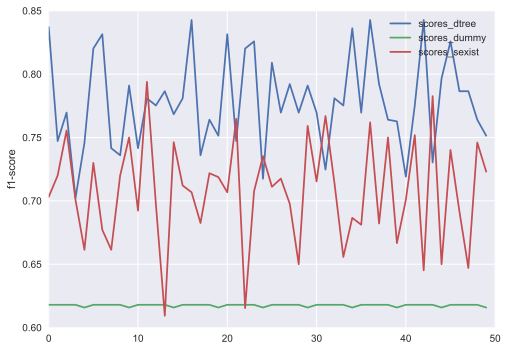

In [65]:
style.use('seaborn')
g_data = pd.DataFrame({'scores_dtree': scores_dtree, 
                       'scores_dummy': scores_dummy, 
                       'scores_sexist': scores_sexist})

sns.lineplot(x=g_data.index.tolist(), y='scores_dtree', data=g_data, markers=True, label = "scores_dtree")
sns.lineplot(x=g_data.index.tolist(), y='scores_dummy', data=g_data, markers=True, label = "scores_dummy")
sns.lineplot(x=g_data.index.tolist(), y='scores_sexist', data=g_data, markers=True, label = "scores_sexist")
plt.legend(loc='best')

plt.ylabel('f1-score')

plt.show()

<br>
<br>
<br>
**Задание:**  
- Подберите оптимальные значения гиперпараметров дерева решений
- Рассмотрите следующие гиперпараметры в диапазонах:
    * max_depth: от 5 до 20  
    * min_samples_split: от 2 до 30
    * min_samples_leaf: от 1 до 15
- Используйте `RepeatedStratifiedKFold(n_splits=5, n_repeats=2)` и `GridSearchCV`
- В качестве метрики используйте `f1-score (f1_micro)`
- Обучите модель с оптимальными параметрами и оцените качество

In [66]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [67]:
dtree_model = DecisionTreeClassifier()
params = {'max_depth': np.arange(5,21),
          'min_samples_split': np.arange(2, 31),
          'min_samples_leaf': np.arange(1, 16)}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

clf = GridSearchCV(dtree_model, params, cv=rskf, scoring='f1_micro')

In [68]:
%%time
clf.fit(titanic_data.drop(['PassengerId', 'Survived'], axis=1),
        titanic_data['Survived'])

Wall time: 5min 55s


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000000888296A048>,
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_mi

In [69]:
clf.best_score_

0.81439820022497189

In [70]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 18}

<br>
<br>
Оценим модель с оптимальными параметрами:

In [71]:
dtree_model = DecisionTreeClassifier(max_depth=5,
                                     min_samples_leaf=8,
                                     min_samples_split=18)
dtree_model.fit(trainData, train_label)

preds = dtree_model.predict(testData)

In [72]:
dot_data = export_graphviz(dtree_model, 
                           out_file=None, 
                           feature_names=trainData.columns, 
                           class_names=['0', '1'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("dtree_titanic_56428234_opt") 

'dtree_titanic_56428234_opt.pdf'

Accuracy: 0.77528 
Balanced accuracy: 0.7621

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       161
           1       0.73      0.70      0.71       106

   micro avg       0.78      0.78      0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



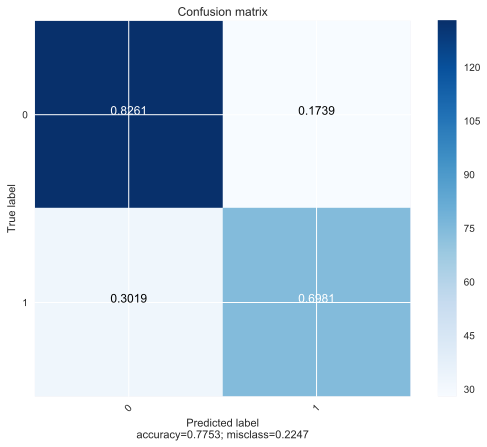

In [73]:
print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5))

print()
print(metrics.classification_report(test_label, preds))

plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                      target_names=['0', '1'],
                     normalize=True)

## Задания  <a id="tasks"></a>
  
1. Решите задачу классификации пассажиров Титаника с помощью логистической регрессии и метода К-ближайших соседей.  
Подберите оптимальные значения гиперпараметров каждой модели, используйте рассмотренные валидаторы и `GridSearchCV`.  
Сравните качество моделей с качеством дерева решений.     
<br>
<br>
2. Решите задачу классификации пассажиров Титаника, но с минимальной предобработкой данных - удалите признак `Cabin` и текстовые признаки (`Name`, `Ticket`); удалите наблюдения с пропусками по признаку `Embarked`; пропуски по признаку `Age` заполните средним значением по известным наблюдениям.  
Используйте логистическую регрессию, К-ближайших соседей и дерево решений. Подберите оптимальные гиперпараметры для каждой модели.  
Сравните качество решений с качеством решений, полученным на модифицированном датасете в пункте 1.  
<br>
<br>
2. Решите задачу регрессии (набор данных diabetes) с помощью Дерева решений (`DecisionTreeRegressor`), настройте гиперпараметры. Сравните качество полученного решения с другими моделями (см. Задания в `Recap.Supervised_Learning.ipynb`)